<h1><center>Text Mining Twitter Project</center></h1>
<h3><center>by Ping Xu</center></h3>

### Introduction

China has been implementing "Zero Covid" policy all over the country. It means having zero tolerance for slow response to outbreaks. The government is taking extreme measures to contain the virus including a city-wide lockdown. Now Shanghai has become the hotspot of Covid-19 and citizens are confined at their home for almost two months. This is a very controversial policy because it worked in the begining of the pandemic but now the omicron is hard to control and the cost is increasing. We want to conduct sentiment analysis regarding this policy and see what the world think of it.

The Economist is a British weekly newspaper that focuses on current affairs, international business, politics, technology, and culture.It is one of the most renowed and popular magazine in the world. In this project, I will dive into the tweets from this magazine and calculate the word frequency to see what topics are hot recently. 

This project is aimed to analyze twitter texts with the key words "Zero Covid". The most recent twitter texts regarding the "zero covid" and the tweets from twitter screen name "TheEconomist" will be collected to perform the following:
- Collect tweets for specific topic and username
- List the most poplular locations 
- Conduct sentiment analysis
- Calculate word frequency
- plot time series visualization
- derive conclusions

### Import Required Libraries

In [1]:
#import libraries to deal with the Twitter API authorization
import tweepy as tweepy
from tweepy import OAuthHandler, Stream
from credentials import *

#import pandas to deal with dataframes and more
import pandas as pd

#import numpy for number computing
import numpy as np

#import visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns
import itertools
from IPython.display import display

#import collections to deal with collections
import collections

#import nltk to deal with natural language processing 
import nltk
from nltk.corpus import stopwords
import re
import networkx

#import textblob to deal with sentiment analysis
from textblob import TextBlob

#to filter warnings
import warnings
warnings.filterwarnings("ignore")

#setting some configurations for seaborn related plots
#setting the background style and font scale to make the plots look nicer
sns.set(font_scale=1.5)
sns.set_style("whitegrid")

### Authorize an Application to Access Twitter Account Data

In [2]:
#required keys and tokens

#CONSUMER_KEY = 'xx'
#CONSUMER_SECRET = 'xx'
#ACCESS_TOKEN = 'xxx'
#ACCESS_SECRET = 'xx'

# define a function that set up twitter API 
def twitter_setup():
    """
    Utility function to setup the Twitter's API
    with our access keys provided.
    """
    # Authentication and access using keys:
    auth = tweepy.OAuthHandler(CONSUMER_KEY, CONSUMER_SECRET)
    auth.set_access_token(ACCESS_TOKEN, ACCESS_SECRET)

    # Return API with authentication:
    api = tweepy.API(auth, wait_on_rate_limit = True)
    return api

# create a twitter_api object which sets up the authentication
twitter_api = twitter_setup()

# Nothing to see by displaying twitter_api except that it's now a defined variable
print(twitter_api)

### Get Tweets Related to Zero Covid Policy

In [44]:
#define the search term and date_since as variables
#remove retweets in search term
search_term = "zero + covid -filter:retweets"
date_since = '2022-04-20'

#collect tweets since date 2022-01-01
#use Cursor() to search twitter for tweets containing the search term #zero covid 
#items(1000)will return the most 1000 recent tweets
tweets = tweepy.Cursor(twitter_api.search_tweets,
                   q=search_term,
                   lang="en",
                   since_id=date_since).items(1000)


#define a variable all_tweets to return all the tweets that are collected previously
all_tweets = [tweet.text for tweet in tweets]

#display 5 of the most recent tweets
all_tweets[:5]

['#Xi’s strict #covid policies prompt rumblings of #discontent in #China https://t.co/Y7szZSEvOH',
 "With eye on China's zero-Covid chaos, Taiwan seizes chance to open up \n\nhttps://t.co/PqH638dBD3",
 '@DrShaneRRR @YouAreLobbyLud Every family in my workplace has been impacted by covid. Kids were the index case every… https://t.co/6ZXKFu6CQU',
 '@derflecha Ecb 🤝 zero COVID policy 🤝 fed 🤝 putin 🤝 outras suply chains',
 '@SCMPNews The only way to overcome Covid is by ensuring that majority of population are exposed to the Virus. All c… https://t.co/dhM5SBXJMi']

### Remove URLs(links)

In [41]:
# remove elements that are not wanted in word counts
# remove URLs (links) using regular expressions accessed from the re package
# tell the search to find all strings that look like a URL, and replace it with nothing – "". 
# it also removes other punctionation including hashtags - #.
# define a function that takes the text in each tweet and replaces the URL with "" (nothing)

def remove_url(txt):
    """Replace URLs found in a text string with nothing 
    (i.e. it will remove the URL from the string).

    Parameters
    ----------
    txt : string
        A text string that you want to parse and remove urls.

    Returns
    -------
    The same txt string with url's removed.
    """

    return " ".join(re.sub("([^0-9A-Za-z \t])|(\w+:\/\/\S+)", "", txt).split())

In [46]:
# after defining the function,call it in a list comprehension to create a list of the clean tweets.
all_tweets_no_urls = [remove_url(tweet) for tweet in all_tweets]

# display all the 1000 tweets without urls
all_tweets_no_urls

['Xis strict covid policies prompt rumblings of discontent in China',
 'With eye on Chinas zeroCovid chaos Taiwan seizes chance to open up',
 'DrShaneRRR YouAreLobbyLud Every family in my workplace has been impacted by covid Kids were the index case every',
 'derflecha Ecb zero COVID policy fed putin outras suply chains',
 'SCMPNews The only way to overcome Covid is by ensuring that majority of population are exposed to the Virus All c',
 'JReinerMD donlemon Only in MO Last state to have a OPID drug base but 1st to vote on drugs that have zero effect',
 'Stress levels are rising for global investors in China as authorities double down on Covid Zero Heres where the b',
 'LawrenceForbe16 stillz68795489 Jason elonmusk Covid was so scary dude It was so scary that us essential people',
 'MadhyaPradesh Sees 35 New COVID Cases 33 Recoveries Positivity rate went down to 04 from 05 Gujarat repo',
 'YouAreLobbyLud I dont know about suppression to zero That seems more aspirational than achievable

In [47]:
# create a pandas dataframe named df
df = pd.DataFrame(all_tweets_no_urls, columns=['Tweets'])

# display the first 10 elements of the dataframe:
df.head(10)

,Tweets
0,Xis strict covid policies prompt rumblings of ...
1,With eye on Chinas zeroCovid chaos Taiwan seiz...
2,DrShaneRRR YouAreLobbyLud Every family in my w...
3,derflecha Ecb zero COVID policy fed putin outr...
4,SCMPNews The only way to overcome Covid is by ...
5,JReinerMD donlemon Only in MO Last state to ha...
6,Stress levels are rising for global investors ...
7,LawrenceForbe16 stillz68795489 Jason elonmusk ...
8,MadhyaPradesh Sees 35 New COVID Cases 33 Recov...
9,YouAreLobbyLud I dont know about suppression t...


### Who is Tweeting about Zero Covid?

In [55]:
# collect tweets again
tweets = tweepy.Cursor(twitter_api.search_tweets,
                   q=search_term,
                   lang="en",
                   since_id=date_since).items(1000)

In [56]:
# define variable user_locs to return users' screen name and locations
users_locs = [[tweet.user.screen_name, tweet.user.location] for tweet in tweets]

# display the most recent 5 users' screen name and their locations
users_locs[:5]

[['IceAge2150', 'Boston, MA'],
 ['SusanGillis', 'C~Town'],
 ['JPMasters', 'Sydney'],
 ['JeniKay73', 'Hebron, OH'],
 ['me_unsolicited', '🏳️\u200d⚧️']]

In [57]:
# create a Pandas dataframe from a list of tweet data
tweet_locs = pd.DataFrame(data=users_locs, columns=['screen_name', 'location'])

# display tweet_locs 
tweet_locs.head()

,screen_name,location
0,IceAge2150,"Boston, MA"
1,SusanGillis,C~Town
2,JPMasters,Sydney
3,JeniKay73,"Hebron, OH"
4,me_unsolicited,🏳️‍⚧️


### Find the Most Popular Locations

In [60]:
# count the values for each country and convert the result into a dataframe
tweet_locs['location'].value_counts().head(20).to_frame()

,location
,389
United States,17
"New York, NY",14
"Washington, DC",11
USA,9
"New York, USA",7
Singapore,7
Beijing,6
"Vancouver 溫哥華, Canada 加拿大 🇨🇦",6
India,6


#### Conclusion:
The most popular countries where users tweet topics about "zero covid" are United States, Canada, China, Singapore and India. 

### Sentiment Analysis

In [49]:
# define a function to clean tweets
def clean_tweet(tweet):
    '''
    Utility function to clean the text in a tweet by removing
    links and special characters using regex.
    '''
    return ' '.join(re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)", " ", tweet).split())

# define a function to analyze sentiment
def analize_sentiment(tweet):
    '''
    Utility function to classify the polarity of a tweet
    using textblob.
    '''
    analysis = TextBlob(remove_url(tweet))
    if analysis.sentiment.polarity > 0:
        return 1
    elif analysis.sentiment.polarity == 0:
        return 0
    else:
        return -1

In [50]:
# create a column with the result of the analysis:
df['SA'] = np.array([ analize_sentiment(tweet) for tweet in df['Tweets'] ])

# display the updated dataframe with the new column:
display(df.head(10))

,Tweets,SA
0,Xis strict covid policies prompt rumblings of ...,0
1,With eye on Chinas zeroCovid chaos Taiwan seiz...,0
2,DrShaneRRR YouAreLobbyLud Every family in my w...,0
3,derflecha Ecb zero COVID policy fed putin outr...,0
4,SCMPNews The only way to overcome Covid is by ...,0
5,JReinerMD donlemon Only in MO Last state to ha...,-1
6,Stress levels are rising for global investors ...,-1
7,LawrenceForbe16 stillz68795489 Jason elonmusk ...,-1
8,MadhyaPradesh Sees 35 New COVID Cases 33 Recov...,-1
9,YouAreLobbyLud I dont know about suppression t...,1


In [51]:
# construct lists with classified tweets:
pos_tweets = [ tweet for index, tweet in enumerate(df['Tweets']) if df['SA'][index] > 0]
neu_tweets = [ tweet for index, tweet in enumerate(df['Tweets']) if df['SA'][index] == 0]
neg_tweets = [ tweet for index, tweet in enumerate(df['Tweets']) if df['SA'][index] < 0]

In [52]:
# calculate the percentages and print
print("Percentage of positive tweets: {:.2f}%".format(len(pos_tweets)*100/len(df['Tweets'])))
print("Percentage of neutral tweets: {:.2f}%".format(len(neu_tweets)*100/len(df['Tweets'])))
print("Percentage de negative tweets: {:.2f}%".format(len(neg_tweets)*100/len(df['Tweets'])))

Percentage of positive tweets: 30.30%
Percentage of neutral tweets: 43.10%
Percentage de negative tweets: 26.60%


#### Conclusion:
43% of the recent 1000 tweets have neutral attitudes, about 30% have positive views and the other 26% have negtive sentiments.

### Tweets Extraction for User Account the Economist

- Extract the tweets information for account the Economist
- Perform time series analysis and visualization
- count word frequencies to dig the most popular topics

In [113]:
# create an extractor object 
extractor = twitter_setup()

# create a tweet list that extracts the most recent 200 tweets
tweets_eco = extractor.user_timeline(screen_name="TheEconomist", count=200)
print("Number of tweets extracted: {}.\n".format(len(tweets)))

# print the most recent 5 tweets:
print("5 recent tweets:\n")
for tweet in tweets_eco[:5]:
    print(tweet.text)
    print()

Number of tweets extracted: 200.

5 recent tweets:

“Águas de Março” (“Waters of March”), a soft-jazz track from 1972, was voted Brazil’s best-ever song at the beginni… https://t.co/iQfsXALS3L

Even if India manages a growth rate of nearer 6% than 9%, that would be nothing to sneeze at. It would make India t… https://t.co/ZBdu7R9916

The politics of Eurovision: Russia was expelled and Ukraine is favourite to win 
https://t.co/tLtYwBEcZR

Narendra Modi wants to restore Indian great­ness. For him, that seems to involve not only building a large, in­tegr… https://t.co/I0kODmYApX

The state is now the largest legal weed market in the world, raking in $5.2bn in sales in 2021 https://t.co/8ituzCRm8y



In [114]:
# print info from the first tweet:
print(tweets_eco[0].id)
print(tweets_eco[0].created_at)
print(tweets_eco[0].source)
print(tweets_eco[0].favorite_count)
print(tweets_eco[0].retweet_count)
print(tweets_eco[0].geo)
print(tweets_eco[0].coordinates)
print(tweets_eco[0].entities)

1525335396044898304
2022-05-14 04:41:12+00:00
SocialFlow
10
2
None
None
{'hashtags': [], 'symbols': [], 'user_mentions': [], 'urls': [{'url': 'https://t.co/iQfsXALS3L', 'expanded_url': 'https://twitter.com/i/web/status/1525335396044898304', 'display_url': 'twitter.com/i/web/status/1…', 'indices': [117, 140]}]}


In [115]:
# create a pandas dataframe 
data = pd.DataFrame(data=[tweet.text for tweet in tweets_eco], columns=['Tweets'])

# display the first 10 elements of the dataframe:
data.head(10)

,Tweets
0,"“Águas de Março” (“Waters of March”), a soft-j..."
1,Even if India manages a growth rate of nearer ...
2,The politics of Eurovision: Russia was expelle...
3,Narendra Modi wants to restore Indian great­ne...
4,The state is now the largest legal weed market...
5,It makes sense for Sweden to move more slowly ...
6,"Big cats and highways do not mix, which is why..."
7,America’s slowdown is contributing to weaker d...
8,Black holes themselves cannot be seen: their g...
9,Conventional wisdom holds that a strong civil ...


In [116]:
# add relevant info to our dataframe
data['len']  = np.array([len(tweet.text) for tweet in tweets_eco])
data['ID']   = np.array([tweet.id for tweet in tweets_eco])
data['Date'] = np.array([tweet.created_at for tweet in tweets_eco])
data['Source'] = np.array([tweet.source for tweet in tweets_eco])
data['Likes']  = np.array([tweet.favorite_count for tweet in tweets_eco])
data['RTs']    = np.array([tweet.retweet_count for tweet in tweets_eco])

In [117]:
# Display of first 10 elements from dataframe:
data.head(10)

,Tweets,len,ID,Date,Source,Likes,RTs
0,"“Águas de Março” (“Waters of March”), a soft-j...",140,1525335396044898304,2022-05-14 04:41:12+00:00,SocialFlow,10,2
1,Even if India manages a growth rate of nearer ...,140,1525330971553320962,2022-05-14 04:23:37+00:00,SocialFlow,39,10
2,The politics of Eurovision: Russia was expelle...,104,1525325589833555968,2022-05-14 04:02:14+00:00,SocialFlow,50,17
3,Narendra Modi wants to restore Indian great­ne...,140,1525321034739630080,2022-05-14 03:44:08+00:00,SocialFlow,59,27
4,The state is now the largest legal weed market...,118,1525316264209657857,2022-05-14 03:25:11+00:00,SocialFlow,39,15
5,It makes sense for Sweden to move more slowly ...,140,1525311939135643649,2022-05-14 03:07:59+00:00,SocialFlow,76,13
6,"Big cats and highways do not mix, which is why...",140,1525307225174065154,2022-05-14 02:49:15+00:00,SocialFlow,99,28
7,America’s slowdown is contributing to weaker d...,140,1525302546750906368,2022-05-14 02:30:40+00:00,SocialFlow,42,16
8,Black holes themselves cannot be seen: their g...,140,1525297959503818752,2022-05-14 02:12:26+00:00,SocialFlow,81,18
9,Conventional wisdom holds that a strong civil ...,140,1525293135370326016,2022-05-14 01:53:16+00:00,SocialFlow,69,32


### Visualization and Basic Statistics

In [118]:
#let's extract the average length of tweets
mean = np.mean(data['len'])

#print the average length for all the tweets
print("The average length in tweets: {}".format(mean))

The average length in tweets: 130.485


In [119]:
# extract the tweet with the most FAVs and the most RTs:

fav_max = np.max(data['Likes'])
rt_max  = np.max(data['RTs'])

fav = data[data.Likes == fav_max].index[0]
rt  = data[data.RTs == rt_max].index[0]

# Max FAVs:
print("The tweet with the most likes is: \n{}".format(data['Tweets'][fav]))
print("Number of likes: {}".format(fav_max))
print("{} characters.\n".format(data['len'][fav]))

# Max RTs:
print("The tweet with the most retweets is: \n{}".format(data['Tweets'][rt]))
print("Number of retweets: {}".format(rt_max))
print("{} characters.\n".format(data['len'][rt]))

The tweet with the most likes is: 
Vladimir Putin’s attack on Ukraine, intended to push NATO back from Russia’s borders, has instead brought it closer https://t.co/YC1EouXbMI
Number of likes: 223
139 characters.

The tweet with the most retweets is: 
RT @DSORennie: Why Xi's China is reviving Maoist tools of social control, delegating powers to grassroots CCP members with hazy legal manda…
Number of retweets: 112
140 characters.



#### Conclusion:
The tweet that people like most is the topic regarding Vladimir Putin's attack on Ukraine.
the tweet that people retweets the most is the topic about Xi's Maoist control.

### Time Series
- Construct time series respect tweets lengths, likes and retweets
- Visualize the changes along the time

In [120]:
#create time series respect tweets lengths, likes and retweets
tlen = pd.Series(data=data['len'].values, index=data['Date'])
tfav = pd.Series(data=data['Likes'].values, index=data['Date'])
tret = pd.Series(data=data['RTs'].values, index=data['Date'])

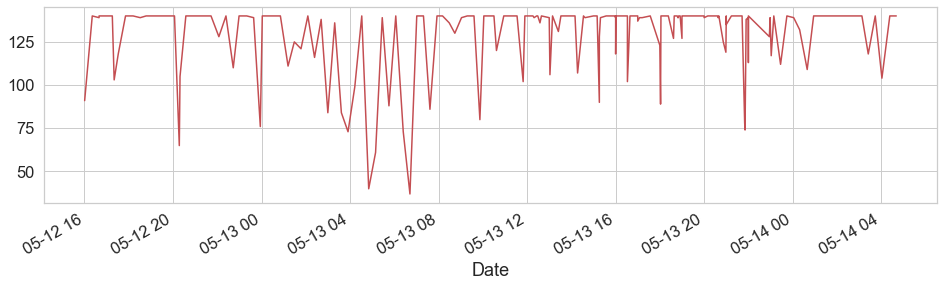

In [121]:
# plot a time series for lengths
tlen.plot(figsize=(16,4), color='r');

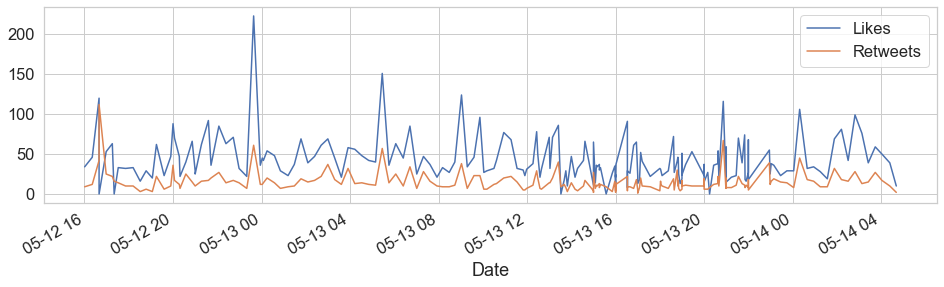

In [122]:
# plot Likes vs retweets visualization:
tfav.plot(figsize=(16,4), label="Likes", legend=True)
tret.plot(figsize=(16,4), label="Retweets", legend=True);

#### Conclusion:
The length of the tweets from the Economist fluctuated in recent days.
The likes are more than retweets, and they are very consistent.

### Count the Number of Sources and Create Pie Chart

In [123]:
# obtain all possible sources:
sources = []
for source in data['Source']:
    if source not in sources:
        sources.append(source)

# print sources list:
print("Creation of content sources:")
for source in sources:
    print("* {}".format(source))

Creation of content sources:
* SocialFlow
* Twitter Web App
* Twitter for Advertisers


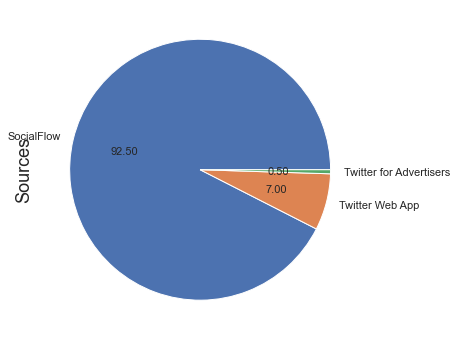

In [124]:
# We create a numpy vector mapped to labels:
count = np.zeros(len(sources))

for source in data['Source']:
    for index in range(len(sources)):
        if source == sources[index]:
            count[index] += 1
            pass

# Pie chart:
pie_chart = pd.Series(count, index=sources, name='Sources')
pie_chart.plot.pie(fontsize=11, autopct='%.2f', figsize=(6, 6));

#### Conlusion:
This twiiter account has three sources: SocialFlow, Twitter Web App and Twitter for Advertisers. From the pie chart, we can see that the main content source is SocialFlow.

### Count word Frequency

In [129]:
# store the texts of all tweets in a variable called all_tweets_eco
all_tweets_eco = [tweet.text for tweet in tweets_eco]

#clean the tweets and store the tweets in a variable named cleaned_tweets
cleaned_tweets = [remove_url(tweet) for tweet in all_tweets_eco]

# since words with capitalization will be different from words that are all lowercase, we need to lower all words
# Split the words from one tweet into unique elements
cleaned_tweets[0].split()

['guas',
 'de',
 'Maro',
 'Waters',
 'of',
 'March',
 'a',
 'softjazz',
 'track',
 'from',
 '1972',
 'was',
 'voted',
 'Brazils',
 'bestever',
 'song',
 'at',
 'the',
 'beginni']

In [130]:
# Create a list of lists containing lowercase words for each tweet
words_in_tweet = [tweet.lower().split() for tweet in cleaned_tweets]
words_in_tweet[:2]

[['guas',
  'de',
  'maro',
  'waters',
  'of',
  'march',
  'a',
  'softjazz',
  'track',
  'from',
  '1972',
  'was',
  'voted',
  'brazils',
  'bestever',
  'song',
  'at',
  'the',
  'beginni'],
 ['even',
  'if',
  'india',
  'manages',
  'a',
  'growth',
  'rate',
  'of',
  'nearer',
  '6',
  'than',
  '9',
  'that',
  'would',
  'be',
  'nothing',
  'to',
  'sneeze',
  'at',
  'it',
  'would',
  'make',
  'india',
  't']]

### Calculate and Plot Word Frequency

In [131]:
# use itertools to flatten the list
# create a variable all_words_no_urls to return a list of all words across the tweets
all_words = list(itertools.chain(*words_in_tweet))

In [132]:
# Create counter
counts = collections.Counter(all_words)

# The collection.Counter object has a useful built-in method most_common that will return the most commonly used words 
# and the number of times that they are used.
counts.most_common(15)

[('the', 199),
 ('to', 118),
 ('of', 110),
 ('in', 104),
 ('a', 91),
 ('and', 76),
 ('is', 55),
 ('on', 36),
 ('it', 35),
 ('for', 31),
 ('has', 30),
 ('that', 26),
 ('are', 26),
 ('as', 23),
 ('with', 22)]

In [133]:
# create a dataframe including words and count as columns
df_words= pd.DataFrame(counts.most_common(15),
                             columns=['words', 'count'])

df_words.head()

,words,count
0,the,199
1,to,118
2,of,110
3,in,104
4,a,91


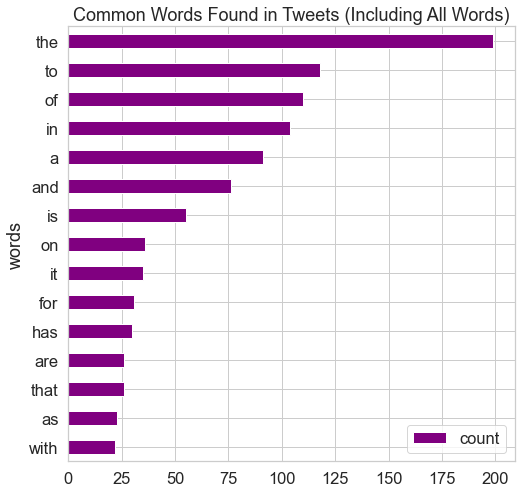

In [134]:
# create a horizontal bar graph of the top 15 most common words in the tweets
fig, ax = plt.subplots(figsize=(8, 8))

# Plot horizontal bar graph
df_words.sort_values(by='count').plot.barh(x='words',
                      y='count',
                      ax=ax,
                      color="purple")

ax.set_title("Common Words Found in Tweets (Including All Words)")

plt.show()

#### Conclusion:
The most frequent used words are almost meaningless words. We need to remove stopwords.

### Remove Stopwords With nltk

In [109]:
# remove words that do not add meaningful information to the text
# download stopwords package from nltk 
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Ping\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [135]:
# create a variable that stores all stopwords in English
stop_words = set(stopwords.words('english'))

In [136]:
# View a few words from the set
list(stop_words)[0:10]

['yours',
 "don't",
 'off',
 'is',
 "mightn't",
 'mustn',
 "you'll",
 'he',
 'over',
 'wasn']

In [137]:
# Let's first look at the words in the first tweet before stopwords are removed.
words_in_tweet[0]

['guas',
 'de',
 'maro',
 'waters',
 'of',
 'march',
 'a',
 'softjazz',
 'track',
 'from',
 '1972',
 'was',
 'voted',
 'brazils',
 'bestever',
 'song',
 'at',
 'the',
 'beginni']

In [138]:
# Remove stop words from each tweet list of words
tweets_nsw = [[word for word in tweet_words if not word in stop_words]
              for tweet_words in words_in_tweet]

# display the words in the first tweet after stopwords are removed
tweets_nsw[0]

['guas',
 'de',
 'maro',
 'waters',
 'march',
 'softjazz',
 'track',
 '1972',
 'voted',
 'brazils',
 'bestever',
 'song',
 'beginni']

In [139]:
# perform the same processes to calculate the most 15 frequent words without stopwords
all_words_nsw = list(itertools.chain(*tweets_nsw))

counts_nsw = collections.Counter(all_words_nsw)

counts_nsw.most_common(15)

[('new', 15),
 ('ukraine', 14),
 ('one', 9),
 ('may', 9),
 ('russian', 8),
 ('would', 7),
 ('russia', 7),
 ('america', 7),
 ('could', 7),
 ('years', 7),
 ('india', 6),
 ('sweden', 6),
 ('finland', 6),
 ('country', 6),
 ('power', 6)]

In [140]:
#create dataframe clean_tweets_nsw to show the words and their correspondent frequencies
clean_tweets_nsw = pd.DataFrame(counts_nsw.most_common(15),
                             columns=['words', 'count'])
clean_tweets_nsw

,words,count
0,new,15
1,ukraine,14
2,one,9
3,may,9
4,russian,8
5,would,7
6,russia,7
7,america,7
8,could,7
9,years,7


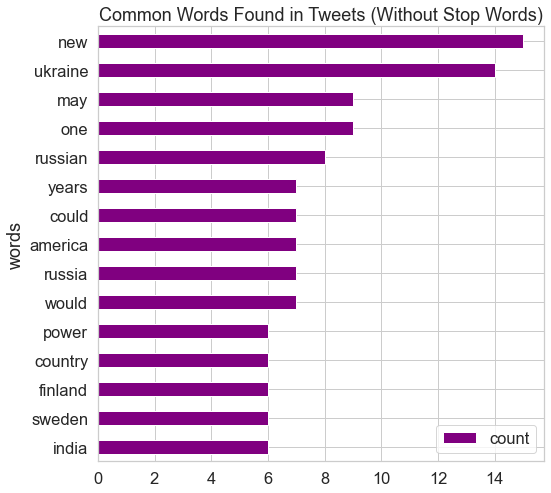

In [141]:
# plot horizontal bar charts of words frequencuies without stopwords
fig, ax = plt.subplots(figsize=(8, 8))

# Plot horizontal bar graph
clean_tweets_nsw.sort_values(by='count').plot.barh(x='words',
                      y='count',
                      ax=ax,
                      color="purple")

ax.set_title("Common Words Found in Tweets (Without Stop Words)")

plt.show()

#### Conclusion:
- The most frequent words that are used in the most recent tweets of the Economist are new, ukraine, may, one, russian and so on.
- Topics regarding Ukraine, Russian, America, Finland, Sweden, India might be talked the most in this magazine.